In [1]:
using DataFrames
using Gadfly
using Compose
set_default_plot_size(32cm, 10cm)

main_dir = "/home/german/labo/16/ANA/examples/4uet/"
frame_cnt = 600

600

In [2]:
function barle_smooth(in_vec::Array{Float64, 1}, div::Number)
    n = length(in_vec)
    k = 0
    suma = 0.0
    out_vec = Array{Float64, 1}(convert(Int64, ceil(n / divi)))
    for i = 1:n
        if i % divi == 0
            k += 1
            suma += in_vec[i]
            out_vec[k] = suma / divi
            suma = 0
        else
            suma += in_vec[i]
        end
    end

    return out_vec
end
    
function barle_smooth(in_vec::DataArrays.DataArray{Float64,1}, div::Number)
    n = length(in_vec)
    k = 0
    suma = 0.0
    out_vec = Array{Float64, 1}(convert(Int64, ceil(n / divi)))
    for i = 1:n
        if i % divi == 0
            k += 1
            suma += in_vec[i]
            out_vec[k] = suma / divi
            suma = 0
        else
            suma += in_vec[i]
        end
    end

    return out_vec
end 

barle_smooth (generic function with 2 methods)

## 4uet

In [3]:
# MDpocket
mdp_uet_vol = readdlm("mdpocket/mdpout_descriptors.txt", header=true)[1][:, 1:2]
# For some reason MD pocket gives output for 599 frames, instead of 600
mdp_uet_vol = [ mdp_uet_vol; [600.0 mdp_uet_vol[598, 2] ] ]

# POVME
pov_uet_vol = convert(Array{Float64, 2}, readdlm("povme/output/POVME_output.txt")[(end-600):end-1, [1, 3]])

# Epock
epo_uet_vol = readdlm(string(main_dir, "epock/volume.dat"), header = true)[1];

# ANA
loprec_ana_uet_vol = readdlm(string(main_dir, "ana/volumen_loprec"));
hiprec_ana_uet_vol = readdlm(string(main_dir, "ana/volumen_hiprec"));

### Correlations

In [7]:
[ cor(loprec_ana_uet_vol[:,2], mdp_uet_vol[:,2]) cor(hiprec_ana_uet_vol[:,2], mdp_uet_vol[:,2]) cor(mdp_uet_vol[:,2], pov_uet_vol[:,2]) cor(mdp_uet_vol[:,2], epo_uet_vol[:,2]) ]

1×4 Array{Float64,2}:
 0.324632  0.388853  0.410892  0.345916

In [4]:
cor_uet_ana_mdp = cor(loprec_ana_uet_vol[:,2], mdp_uet_vol[:,2])
cor_uet_ana_pov = cor(loprec_ana_uet_vol[:,2], pov_uet_vol[:,2])
cor_uet_ana_epo = cor(loprec_ana_uet_vol[:,2], epo_uet_vol[:,2])

[ cor_uet_ana_pov cor_uet_ana_epo cor_uet_ana_mdp ]

1×3 Array{Float64,2}:
 0.715385  0.559659  0.324632

In [5]:
cor_uet_ana_mdp = cor(hiprec_ana_uet_vol[:,2], mdp_uet_vol[:,2])
cor_uet_ana_pov = cor(hiprec_ana_uet_vol[:,2], pov_uet_vol[:,2])
cor_uet_ana_epo = cor(hiprec_ana_uet_vol[:,2], epo_uet_vol[:,2])

[ cor_uet_ana_pov cor_uet_ana_epo cor_uet_ana_mdp ]

1×3 Array{Float64,2}:
 0.80895  0.807095  0.388853

### Volume

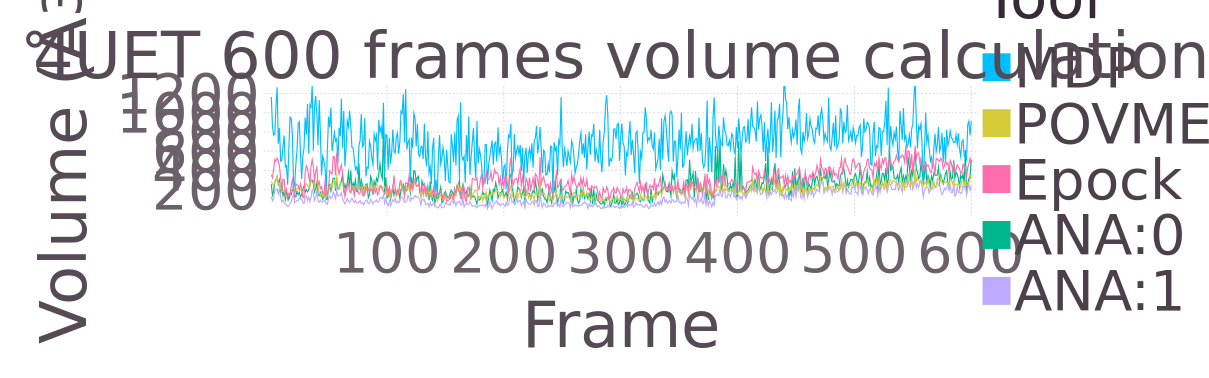

In [6]:
df_uet_vol = DataFrame(Volume = [ mdp_uet_vol[:,2] ; pov_uet_vol[:,2] ; epo_uet_vol[:, 2];
    loprec_ana_uet_vol[:, 2]; hiprec_ana_uet_vol[:, 2] ],
    Frame = [ collect(1:600); collect(1:600); collect(1:600) ; collect(1:600) ; collect(1:600) ],
    Tool = repeat(["MDP" ; "POVME" ; "Epock"; "ANA:0"; "ANA:1"], inner=[length(hiprec_ana_uet_vol[:, 1])]));


pdf_uet_vol = plot(df_uet_vol, Geom.line, x = "Frame", y = "Volume", color="Tool",
    
    Guide.title("4UET 600 frames volume calculation"),
    Guide.xlabel("Frame"),
    Guide.ylabel("Volume (Å<\sup>3</sup>)"),
    Coord.cartesian(ymax = 1200),
    Guide.xticks(ticks = collect(100:100:600)),
    Guide.yticks(ticks = collect(200:200:1200)),

    Theme(minor_label_font_size = 42pt, major_label_font_size = 48pt,
        key_title_font_size=46pt, key_label_font_size=42pt))

### timings

In [7]:
# MDpocket
suma = 0
for i = 1:3
    proto = readdlm(string("mdpocket/", i,"timing"))[1, 2]
    mins = parse(Float64, proto[1:1])
    secs = parse(Float64, proto[3:end-1])
    suma += frame_cnt / (mins*60 + secs)
end
mdp_uet_rate = suma / 3

# POVME
suma = 0
for i = 1:3
    proto = readdlm(string("povme/", i,"timing"))[1, 2]
    mins = parse(Float64, proto[1:1])
    secs = parse(Float64, proto[3:end-1])
    suma += frame_cnt / (mins*60 + secs)
end
povme_uet_rate = suma / 3

# Epock
suma = 0
for i = 1:3
    proto = readdlm(string("epock/", i,"timing"))[1, 2]
    mins = parse(Float64, proto[1:1])
    secs = parse(Float64, proto[3:end-1])
    suma += frame_cnt / (mins*60 + secs)
end
epock_uet_rate = suma / 3

# ANA lo prec
suma = 0
for i = 1:3
    proto = readdlm(string("ana/", i,"timing_loprec"))[1, 2]
    mins = parse(Float64, proto[1:1])
    secs = parse(Float64, proto[3:end-1])
    suma += frame_cnt / (mins*60 + secs)
end
loana_uet_rate = suma / 3
# ANA hi prec
suma = 0
for i = 1:3
    proto = readdlm(string("ana/", i,"timing_hiprec"))[1, 2]
    mins = parse(Float64, proto[1:1])
    secs = parse(Float64, proto[3:end-1])
    suma += frame_cnt / (mins*60 + secs)
end
hiana_uet_rate = suma / 3

uet_rate = DataFrame(Rate = [ mdp_uet_rate ; povme_uet_rate ; epock_uet_rate ; loana_uet_rate ; hiana_uet_rate ],
Tool = ["MDP"; "POVME"; "Epock" ; "ANA:0" ; "ANA:1"])

,Rate,Tool
1,1.6162458746207022,MDP
2,2.2649428561382123,POVME
3,131.95172266886695,Epock
4,53.75805190734821,ANA:0
5,51.69052416708727,ANA:1


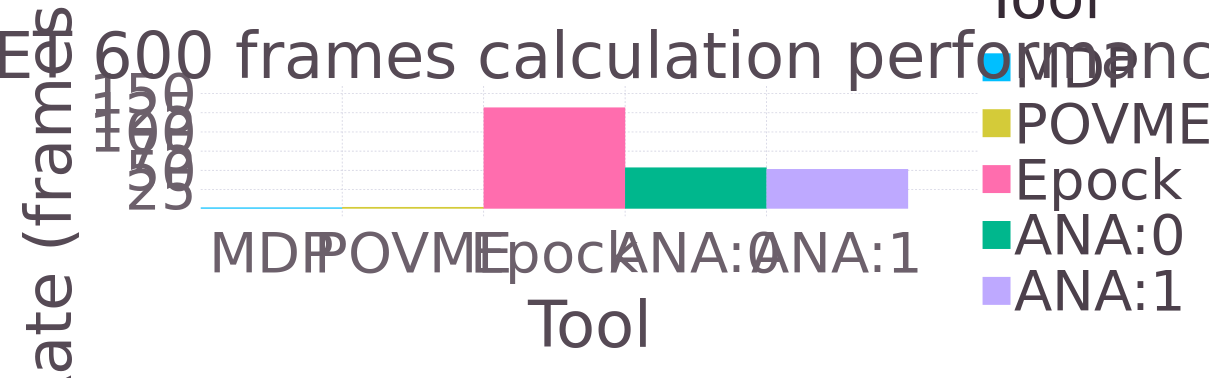

In [12]:
pdf_uet_time = plot(uet_rate, Geom.bar, x = "Tool", y = "Rate", color="Tool",

    Guide.title("4UET 600 frames calculation performance "), 
    
    Coord.Cartesian(xmax=6), 
    Guide.yticks(ticks = collect(25:25:150)),
    Guide.ylabel("Rate (frames / s)"),

    Theme(minor_label_font_size = 42pt, major_label_font_size = 48pt,
        key_title_font_size=46pt, key_label_font_size=42pt))

### save PDFs and PNGs

In [13]:
out_filename_png_uet_vol = "4uet_vol.png"
out_filename_png_uet_time = "4uet_time.png"
draw(PNG(out_filename_png_uet_vol, 1800px, 800px), pdf_uet_vol)
draw(PNG(out_filename_png_uet_time, 1800px, 800px), pdf_uet_time)